# Развлекательное приложение Procrastinate Pro+

В нашем распоряжении данные о визитах, заказах и рекламных расходах.

Нужно разобраться в причине убытков компании и помочь ей вырасти.

**Цели исследования:**

- Выделить причины неэффективности привлечения пользователей
- Сформулировать рекомендации для отдела маркетинга.

**Ход исследования:**

1. Обзор данных
2. Предобработка данных
3. Написание функций для расчёта и анализа LTV, ROI, удержания и конверсии.
4. Исследовательский анализ данных
5. Маркетинг
6. Оценка окупаемости рекламы
7. Рекомендации
8. Общий вывод

### Обзор данных

In [1]:
# импортируем нужные нам библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


В таблице с визитами 309901 строк, пропусков нет, нужно изменить тип данных на datetime в столбцах с началом и концом сессии. Названия столбцов не соотвествуют "змеиному" регистру.

In [4]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


В таблице с заказами 40212 строк, пропусков нет, нужно изменить тип данных на datetime в столбце с временем совершения заказа. Названия столбцов не соответствуют "змеиному" регистру.

In [5]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


В таблице с расходами 1800 строк, пропусков также нет, нужно изменить тип данных на datetime в столбце с датой. Название столбца с названеим канала не соответствует "змеиному" регистру.

#### Промежуточный вывод по этапу обзора данных

В нашем распоряжении три таблицы: с визитами, заказами и расходами. Названия столбцов не соответствуют "змеиному" регистру. Во всех таблицах нужно изменить тип данных в столбце с датой на datetime.

### Предобработка данных

Для начала исправим названия столбцов и приведем к нижнему регистру значения в таблице с визитами.

In [6]:
# приводим название колонок к змеиному регистру

for i in [visits, orders, costs]:
    i.columns = i.columns.str.lower().str.replace(' ', '_')
for i in ['region', 'device']:
    visits[i] = visits[i].str.lower().str.replace(' ', '_')
    
display(visits.head(1))
display(orders.head(1))
costs.head(1)

,user_id,region,device,channel,session_start,session_end
0,981449118918,united_states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


Проверим данные на наличие пропусков

In [7]:
print(visits.isna().sum(),
      orders.isna().sum(),
      costs.isna().sum(),
      sep='\n\n'
     )

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64


Проверим данные на наличие явных дубликатов

In [8]:
print(
    visits.duplicated().sum(),
    orders.duplicated().sum(),
    costs.duplicated().sum()
    )

0 0 0


Теперь на неявные

In [9]:
print(visits['region'].unique(),
      visits['device'].unique(),
      visits['channel'].unique(),
      sep='\n\n'
     )

['united_states' 'uk' 'france' 'germany']

['iphone' 'mac' 'android' 'pc']

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


Теперь изменим тип данных в столбце с датами на datetime.

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt'])

print(visits.dtypes,
      orders.dtypes,
      costs.dtypes,
      sep='\n\n'
     )

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

dt         datetime64[ns]
channel            object
costs             float64
dtype: object


Проверим данные на наличие аномальных значений

In [11]:
# выводим характеристику

print(orders['revenue'].describe(), '\n\n',
      costs['costs'].describe(), '\n\n',
     (visits['session_end'] - visits['session_start']).describe())

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64 

 count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64 

 count                       309901
mean     0 days 00:30:00.090867728
std      0 days 00:30:03.063524541
min                0 days 00:00:00
25%                0 days 00:08:37
50%                0 days 00:20:44
75%                0 days 00:41:37
max                0 days 06:10:57
dtype: object


Аномальных значений не обнаружено

#### Промежуточный вывод по этапу предобработки данных

**Пропуски**:
Пропуски отсутствуют во всех таблицах

**Дупликаты**:
Полное отсутствие явных и неявынх дупликатов

**Аномальные значения**:
Аномальных значений не обнаружено

**Типы данных**:
Были изменениы типы данных в столбцах с датой на datetime

### Написание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

**get_profiles()** - функция для создания профилей пользователей, которая определяет время первого посещения и платящих пользователей, а также источник привлечения.

In [12]:
def get_profiles(sessions, orders):

    # сортируем сессии по ID пользователя и дате первого посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first',
              'region': 'first',
              'device': 'first',
              'channel': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло,
    # а также определим платящих пользователей
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'])

    return profiles

**get_retention()** - функция для подсчета Retention Rate, которая показывает удержание пользователей.

In [13]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

**get_conversion()** - функция для подсчета конверсии, которая показывает накопительную долю платящих пользователей относителньо всей когорты.

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**get_ltv()** - функция для подсчета Lifetime Value и Return On Investment, показывающая среднюю вырочку с одного клиента из когорты.

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**filter_data()** - функция для сглаживания линий графика

In [16]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**plot_retention()** - функция для построения графика удержания пользователей

In [17]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Retention Rate')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Retention Rate')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Retention Rate')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Retention Rate')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**plot_conversion()** - функция для построения графиков конверсии и ее динамики

In [18]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('CR')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Динамика CR')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**plot_ltv_roi()** - функция для построения графика LTV и ROI 

In [19]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('LTV')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Динамика LTV')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Динамика CAC')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('LTV/CAC')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.ylabel('Динамика LTV/CAC')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Промежуточный вывод по этапу написания функций

Были написаны функции для расчёта и анализа LTV, ROI, удержания и конверсии, а также для построения графиков.

### Исследовательский анализ данных

Для начала составим профили пользователей

In [20]:
profiles = get_profiles(visits, orders)

min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() # момент анализа

print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', observation_date)

profiles.head()

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


,user_id,first_ts,region,device,channel,dt,month,payer
0,599326,2019-05-07 20:58:57,united_states,mac,FaceBoom,2019-05-07,2019-05-01,True
1,4919697,2019-07-09 12:46:07,united_states,iphone,FaceBoom,2019-07-09,2019-07-01,False
2,6085896,2019-10-01 09:58:33,france,iphone,organic,2019-10-01,2019-10-01,False
3,22593348,2019-08-22 21:35:48,germany,pc,AdNonSense,2019-08-22,2019-08-01,False
4,31989216,2019-10-02 00:07:44,united_states,iphone,YRabbit,2019-10-02,2019-10-01,False


В нашем распоряжении данные за период с 1 мая 2019 года по 27 октября 2019 года, 27.10.2019 будет моментом анализа, из этих данных были получены профили пользователей: их уникальное id, дата и время первого посещения, регион, девайс, с которого был осуществлен вход, канал привлечения, месяц первого посещения, а также информация о том, является ли пользователь платящим или нет.

,payer_ratio,user_count
region,,
united_states,6.9 %,100002
uk,4.0 %,17575
france,3.8 %,17450
germany,4.1 %,14981


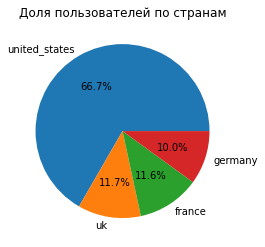

In [21]:
# создаем сводную таблицу по регионам

region_grouped = profiles.pivot_table(
                     index='region', 
                     values=['user_id', 'payer'], 
                     aggfunc={'user_id': 'count', 'payer': 'mean'}
                 ).sort_values(by='user_id', ascending=False).rename(columns={'payer': 'payer_ratio', 'user_id': 'user_count'})

region_grouped['payer_ratio'] = (round(region_grouped['payer_ratio']*100, 1)).astype(str) + ' %'

display(region_grouped)

region_grouped.plot(kind='pie', y='user_count', legend=False, autopct='%.1f%%')
plt.title('Доля пользователей по странам')
plt.ylabel('')
plt.show();

В США наибольшее количество пользователей - 100002 человека, в остальных странах суммарное количество клиентов не превышает даже половины от числа американских пользователей, меньше всего в Германии - 14981, доля платящих в США также больше - 6.9 %, наименьшая доля во Франции - 3.8 %.

,payer_ratio,user_count
device,,
iphone,6.2 %,54479
android,5.9 %,35032
pc,5.0 %,30455
mac,6.4 %,30042


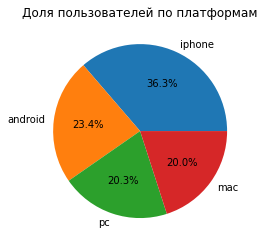

In [22]:
# создаем сводную таблицу по девайсам

device_grouped = profiles.pivot_table(
                     index='device', 
                     values=['user_id', 'payer'], 
                     aggfunc={'user_id': 'count', 'payer': 'mean'}
                 ).sort_values(by='user_id', ascending=False).rename(columns={'payer': 'payer_ratio', 'user_id': 'user_count'})

device_grouped['payer_ratio'] = (round(device_grouped['payer_ratio']*100, 1)).astype(str) + ' %'

display(device_grouped)

device_grouped.plot(kind='pie', y='user_count', legend=False, autopct='%.1f%%')
plt.title('Доля пользователей по платформам')
plt.ylabel('')
plt.show();

Самая популярная платформа среди пользователей это iPhone - 54479 человек, но платящие пользователи предпочитают Mac: доля таких клиентов здесь наибольшая - 6.4 %

,payer_ratio,user_count
channel,,
lambdaMediaAds,10.5 %,2149
AdNonSense,11.3 %,3880
YRabbit,3.8 %,4312
MediaTornado,3.6 %,4364
RocketSuperAds,7.9 %,4448
LeapBob,3.1 %,8553
WahooNetBanner,5.3 %,8553
OppleCreativeMedia,2.7 %,8605
TipTop,9.6 %,19561


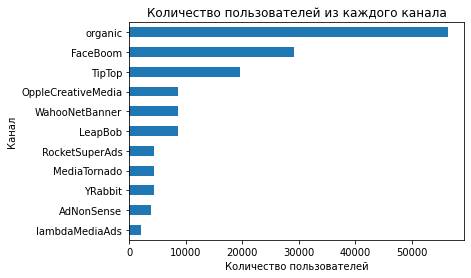

In [23]:
# создаем сводную таблицу по каналм

channel_grouped = profiles.pivot_table(
                     index='channel', 
                     values=['user_id', 'payer'], 
                     aggfunc={'user_id': 'count', 'payer': 'mean'}
                 ).sort_values(by='user_id').rename(columns={'payer': 'payer_ratio', 'user_id': 'user_count'})

channel_grouped['payer_ratio'] = (round(channel_grouped['payer_ratio']*100, 1)).astype(str) + ' %'

display(channel_grouped)

channel_grouped.plot(kind='barh', by='user_count', legend=False)
plt.title('Количество пользователей из каждого канала')
plt.ylabel('Канал')
plt.xlabel('Количество пользователей')
plt.show()

Большинство пользователей нашли это приложение сами - количество "органических" клиентов здесь составляет 56439, меньше всего привлек канал lambdaMediaAds - 2149. Больше всего платящих пользователей пришло из FaceBoom, AdNonSense и lambdaMediaAds - доля таких клиентов здесь больше 10 %. Меньше всего платящих пользователей, как и ожидалось, в "органическом" канале - 2.1 %.

Посмотрим какие каналы наиболее популярны в разных странах

In [24]:
profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='count').sort_values(by='united_states')

region,france,germany,uk,united_states
channel,,,,
YRabbit,NaN,NaN,NaN,4312.0
MediaTornado,NaN,NaN,NaN,4364.0
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
FaceBoom,NaN,NaN,NaN,29144.0
organic,6392.0,5453.0,6421.0,38173.0
AdNonSense,1366.0,1219.0,1295.0,NaN
LeapBob,2988.0,2519.0,3046.0,NaN
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN


Оказывается половина рекламных каналов работает только в США, остальные в Европе, причем основные каналы приходятся на США, поэтому количество клиентов отсюда такое большое по сравнению с Европой.

#### Промежуточный вывод по этапу исследовательского анализа данных

Были получены профили пользователей: их уникальное id, дата и время первого посещения, регион, девайс, с которого был осуществлен вход, канал привлечения, месяц первого посещения, а также информация о том, является ли пользователь платящим или нет. 

Больше всего клиентов из США - 100002 человека, доля платящих там также больше. 

Пользователи предпочитают iPhone, причем платящие тоже, но платящие также предпочитают Mac. 

Большинство пользователей нашли приложение сами, без помощи рекламы, но больше всех привлек канал FaceBoom - 29144 людей, тут же доля платящих наибольшая.

Основные каналы привлечения работают в США, поэтому количество клиентов отсюда такое большое по сравнению с Европой.

### Маркетинг

Сначала посчитаем общую сумму расходов на рекламу

In [25]:
print('Общая сумма расходов на рекламу: ', round(costs['costs'].sum()), '$', sep='')

Общая сумма расходов на рекламу: 105497$


На рекламу в общей сложности было потрачено 105497$ за почти 6 месяцев.

In [26]:
costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего средств было потрачено на каналы TipTop - 54751.3 и FaceBoom - 32445.6. Затраты на остальные не превышают 6000$. Меньше всего было затрат на YRabbit - 944.22.

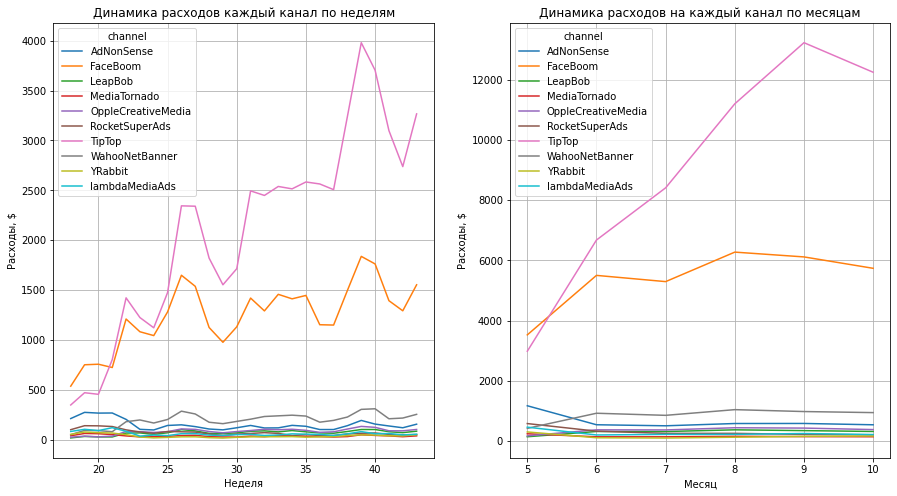

In [27]:
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

plt.figure(figsize=(15, 8))

costs.pivot_table(index='week', 
                  columns='channel', 
                  values='costs', 
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика расходов каждый канал по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы, $')

costs.pivot_table(index='month', 
                  columns='channel', 
                  values='costs', 
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика расходов на каждый канал по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы, $')
plt.show();

Основными каналами привлечения являются TipTop и FaceBoom, их кривые похожи, начиная с 18 недели и вплоть до 26 расходы на рекламу увеличивали, далее наблюдается небольшой спад, затем резкий рост расходов на 39 неделе, расходы на остальные каналы не превышают 500$/нед.

Теперь рассмотрим динамику расходов по месяцам: расходы на TipTop всегда возрастали до сентября, а в июле расходы на FaceBoom немного ниже чем в июне и в сентябре меньше чем в августе, расходы на остальные каналы не превышали 1500$/мес.

Для того чтобы посчитать CAC, модифицируем функцию get_profiles():

In [28]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [29]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,mac,united_states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iphone,united_states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iphone,united_states,2019-10-02,2019-10-01,False,0.230769


In [30]:
profiles.query('channel != "organic"').pivot_table(index='channel', 
                                                   values='acquisition_cost', 
                                                   aggfunc='mean').sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самое высокое среднее САС приходится на канал TipTop - 2.8$. 

Средняя стоимость привлечения одного пользователя для каналов FaceBoom и AdNonSense составляет примерно 1$. Среднее САС для остальных каналов ниже этого значения.

#### Промежуточный вывод по этапу маркетинга

- Общая сумма расходов на рекламу за полгода составила 105497$.

- Больше всего средств было потрачено на каналы TipTop - 54751.3 и FaceBoom - 32445.6.

- Были построены графики динамики расходов на каналы привлечения по неделям и месяцам.

- После модифицирования функции get_profiles() была получена средняя стоимость привлечения одного клиента с одного канала. Самое высокое среднее САС принадлежит TipTop - 2.8$

### Оценка окупаемости рекламы

Так как нас интересует окупаемость рекламы, то пользователей, которые пришли сами, будут исключены из последующего анализа

In [31]:
profiles = profiles.query('channel != "organic"')

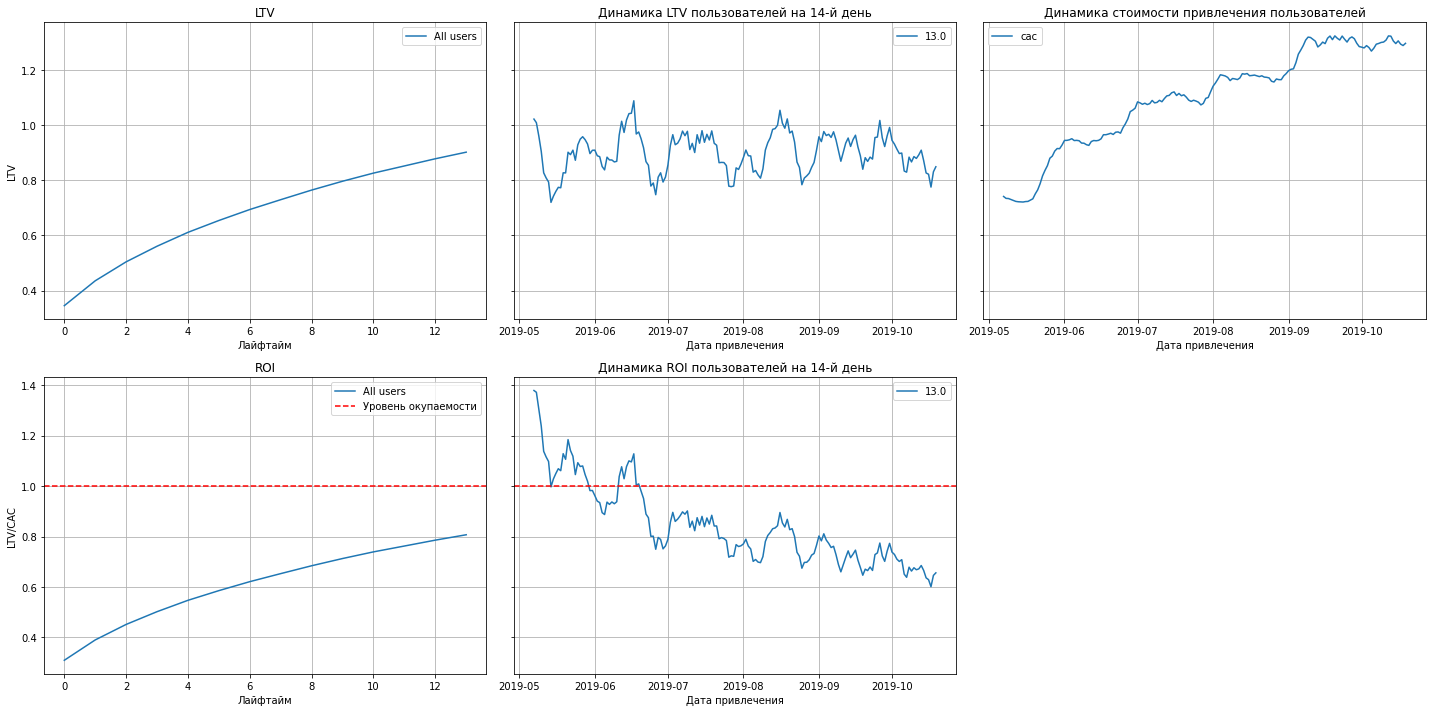

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Реклама не окупается - ROI составляет примерно 0.8 на конец второй недели. САС скачкообразно возрастает, значит было увеличение рекламного бюджета. LTV стабилен.

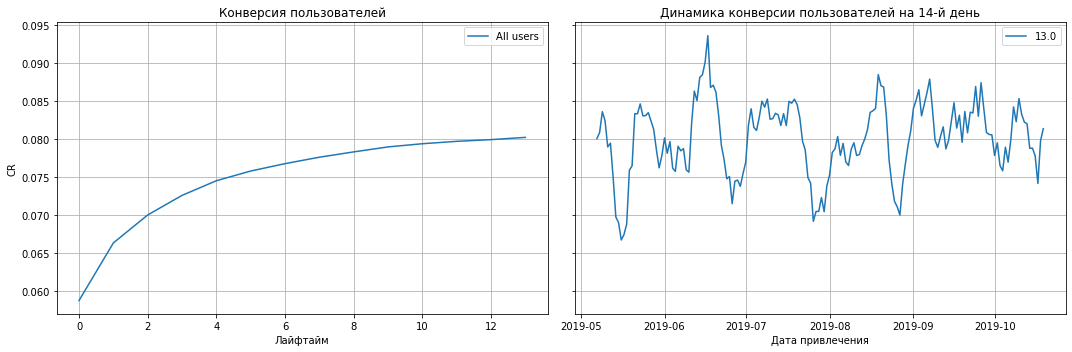

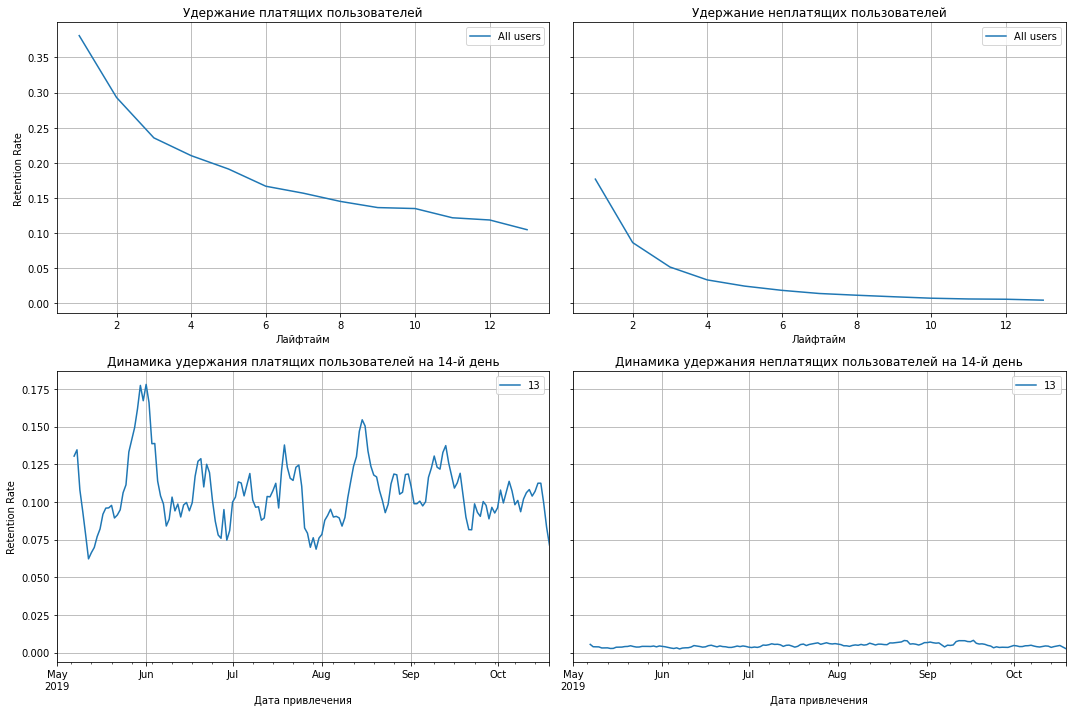

In [33]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Рост конверсии пользователей похож на эталонный, кривая удержания платящих пользоватлей выше чем у неплатящих, оба графика строго убывают, стремясь к нулю.

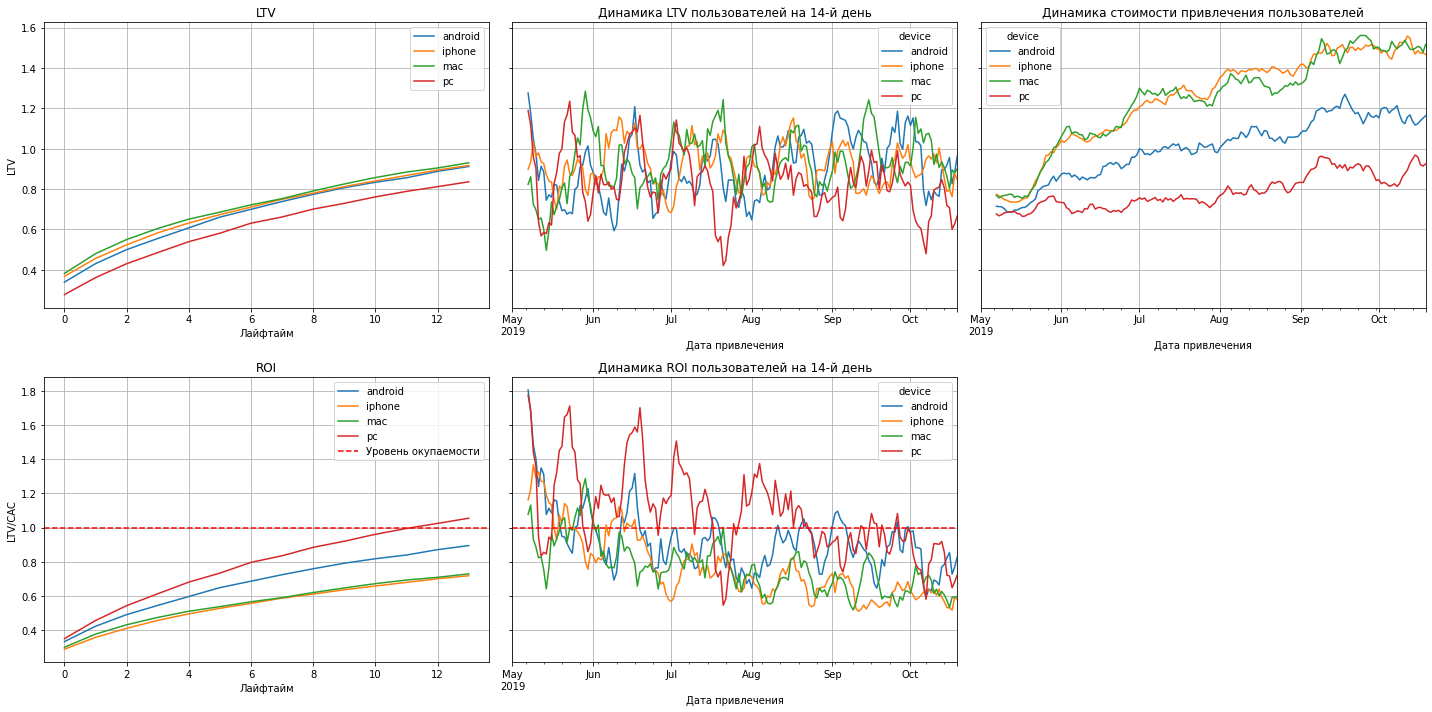

In [34]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Выручка с пользоватлей ПК наименьшая, но при этом это единственная платформа, на которой окупается реклама, возможно это связано с тем, что динамика стоимости привлечения пользователей ПК также меньше остальных. Наибольшие затраты на рекламу уходят на платформы iPhone и Mac. Ожидаемо, ведь основные каналы привлечения направлены на США, но при этом ROI на этих платформах наименьший. Пользователи Android находятся примерно посередине на всех графиках относительно других платформ.

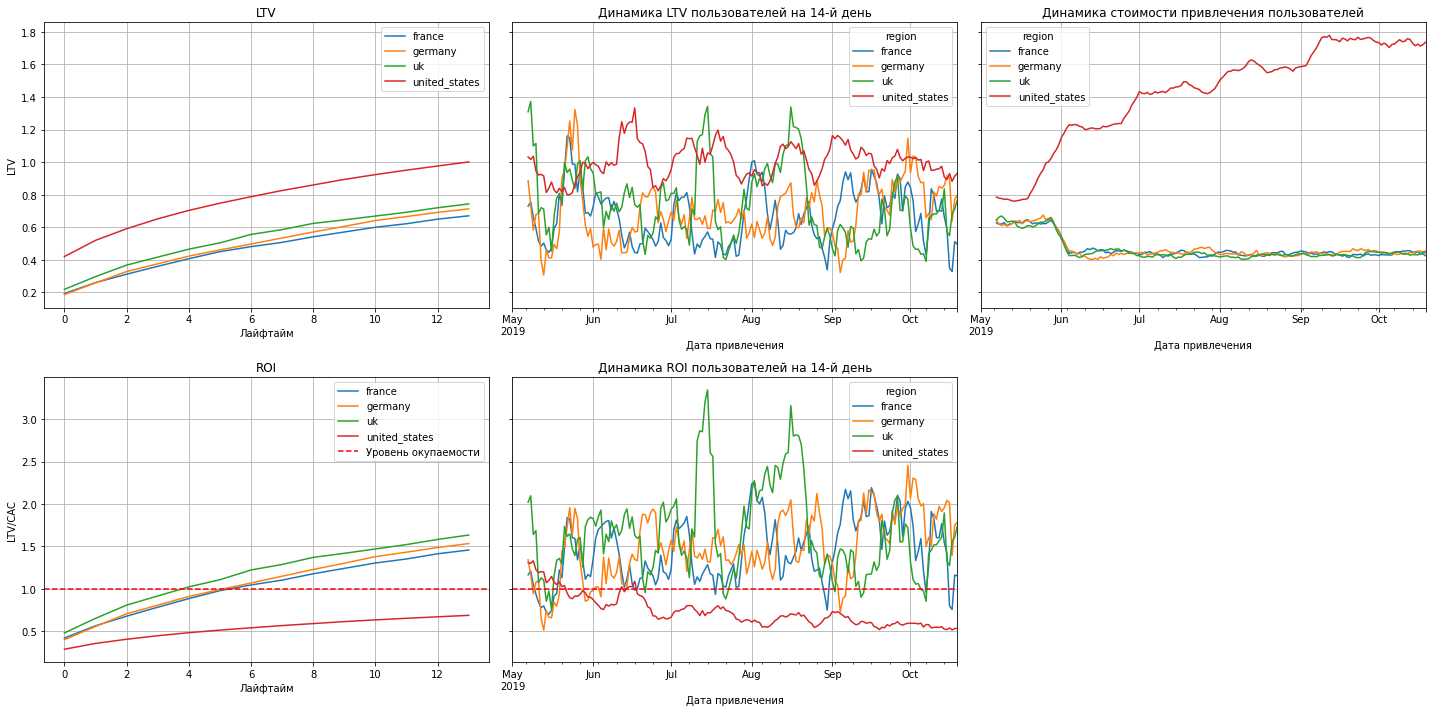

In [35]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Самый высокий LTV принадлежит США, но при этом затраты на рекламу для этого региона сильно выше, причем рост идет постоянно. Судя по графику динамики CАС, маркетинговый отдел в июне сделал упор на американских клиентов, снизив рекламный бюджет на остальные страны. Из-за таких больших затрат на рекламу в США она не окупается, в Европе она окупается уже через неделю.

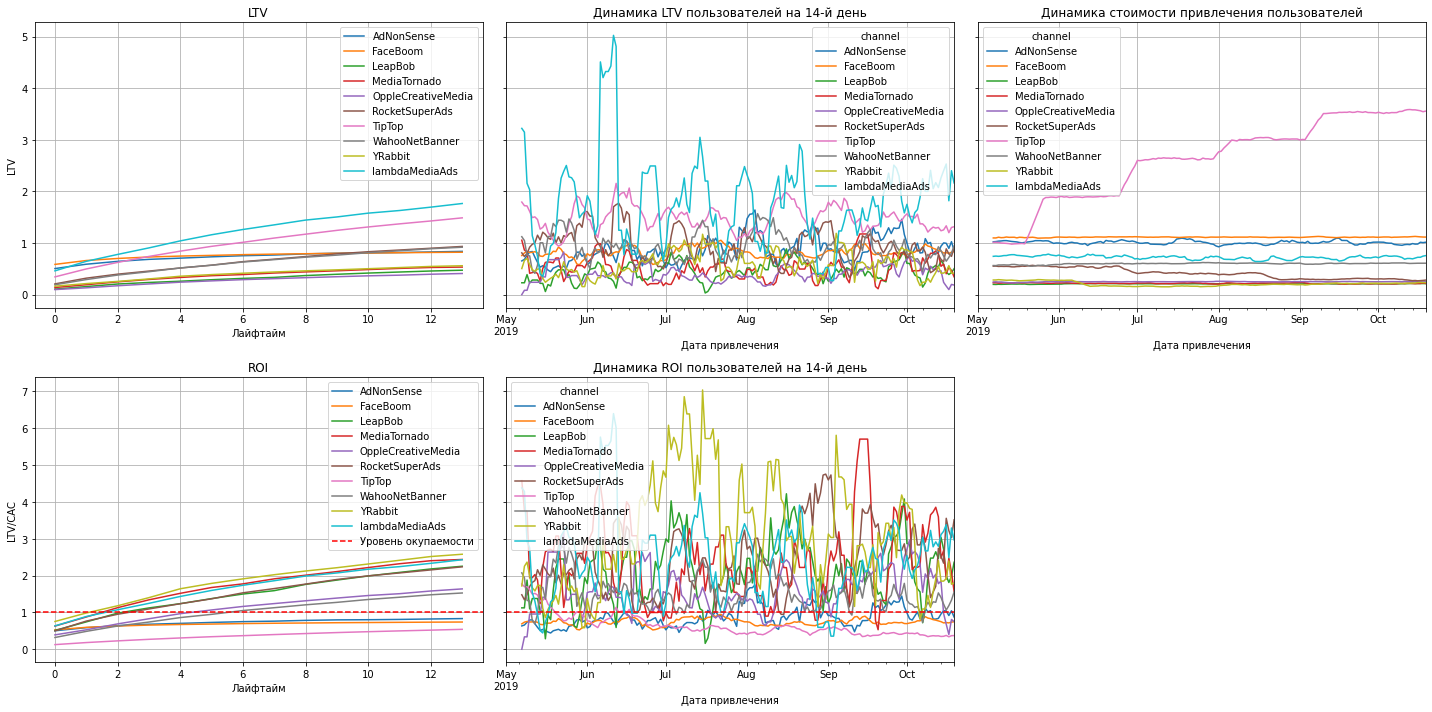

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Динамика САС стабильна везде, кроме TipTop - затраты на этот канал скачкообразно увеличиваются от месяца к месяцу, причем постоянно. Примечательно, что затраты на этот канал не окупаются на равне с FaceBoom и AdNonSense. Самый высокий LTV принадлежит lambdaMediaAds.

Взглянем на конверсию и удержание с разбивкой по регионам и каналам

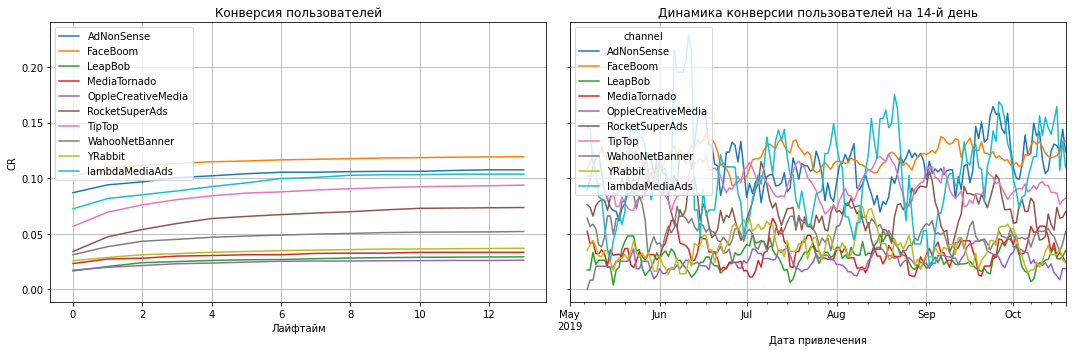

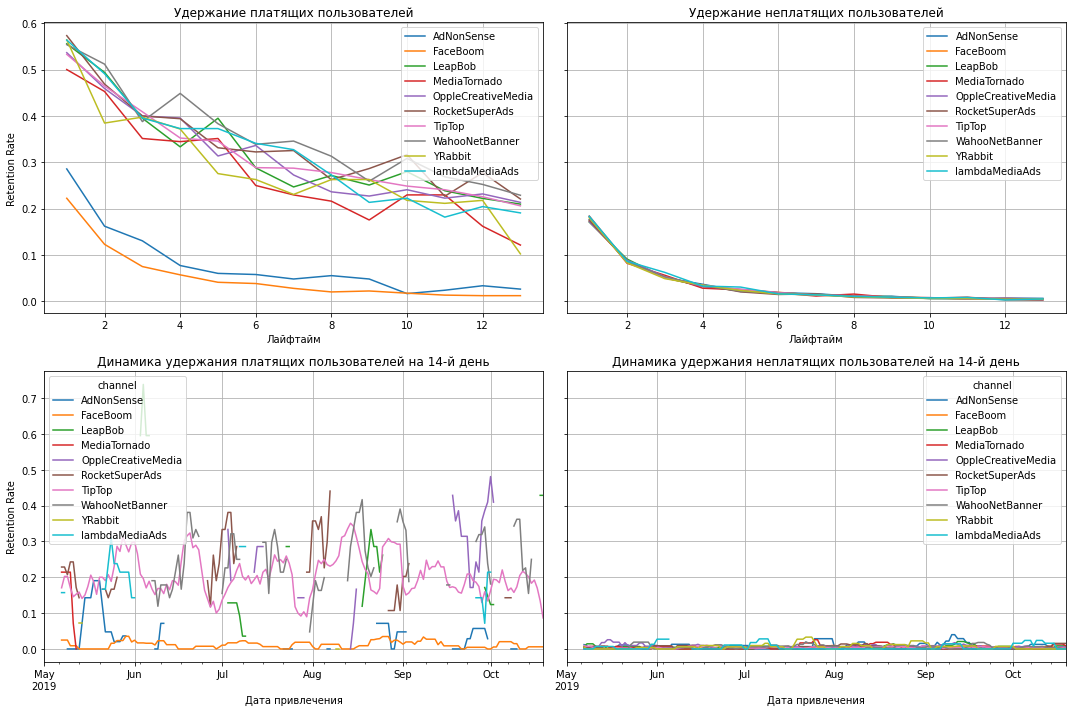

In [37]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей, привлеченных на FaceBoom и AdNonSense, сильно меньше, но при этом такие клиенты хорошо конвертируются.

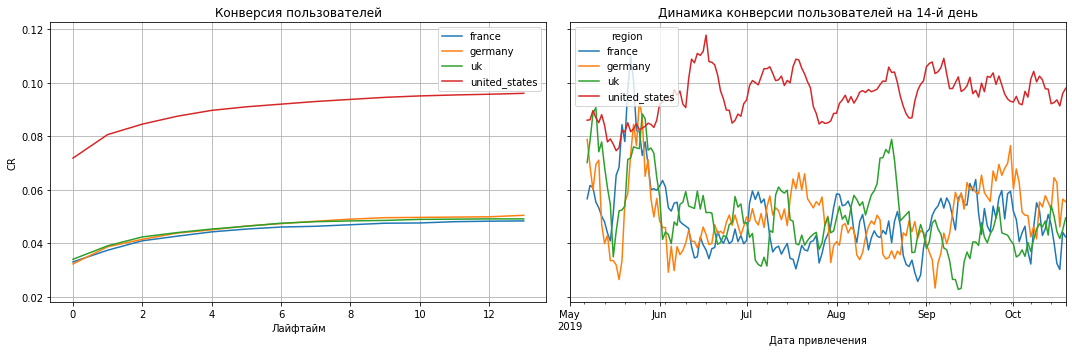

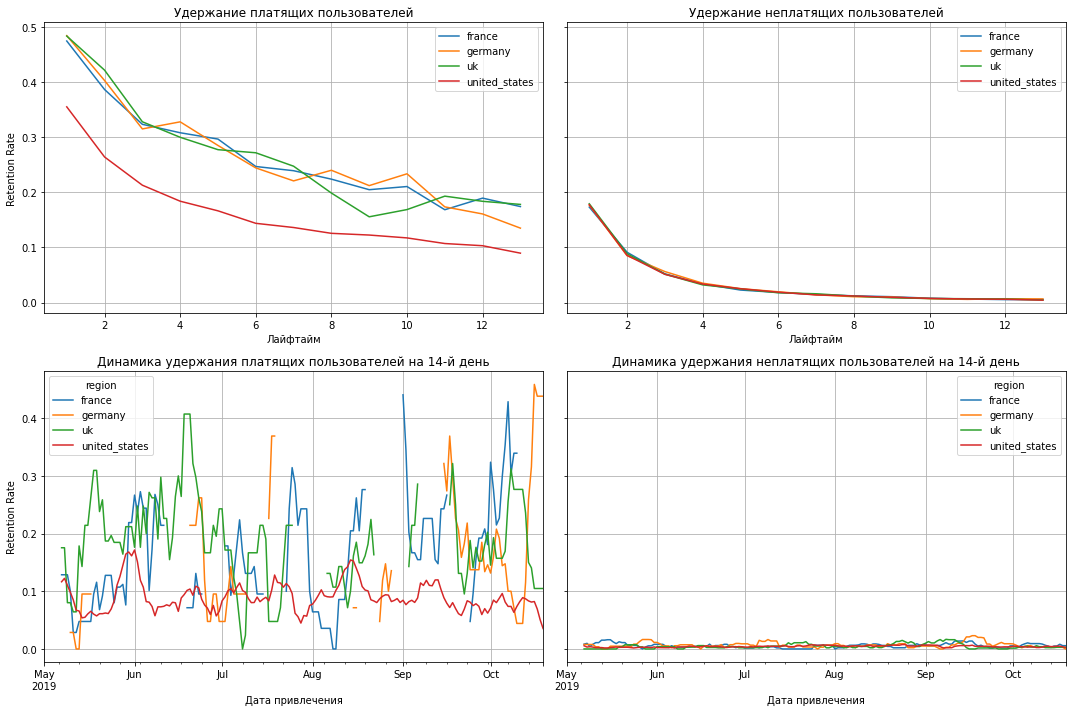

In [38]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США хорошо конвертируются, при этом их удержание наименьшее.

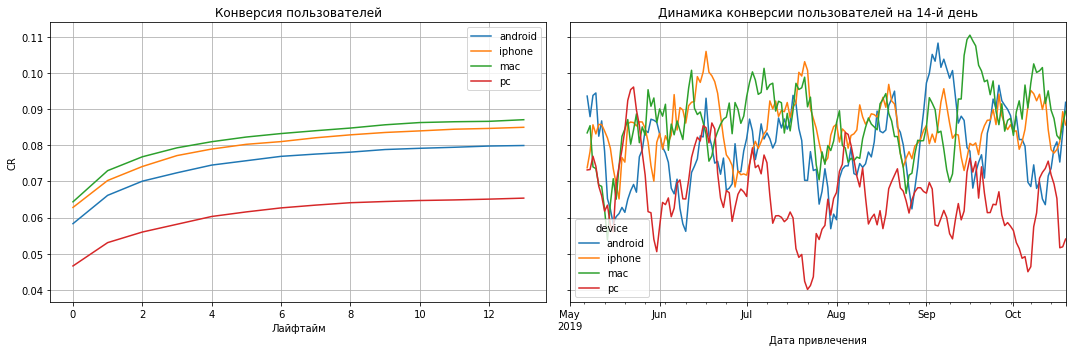

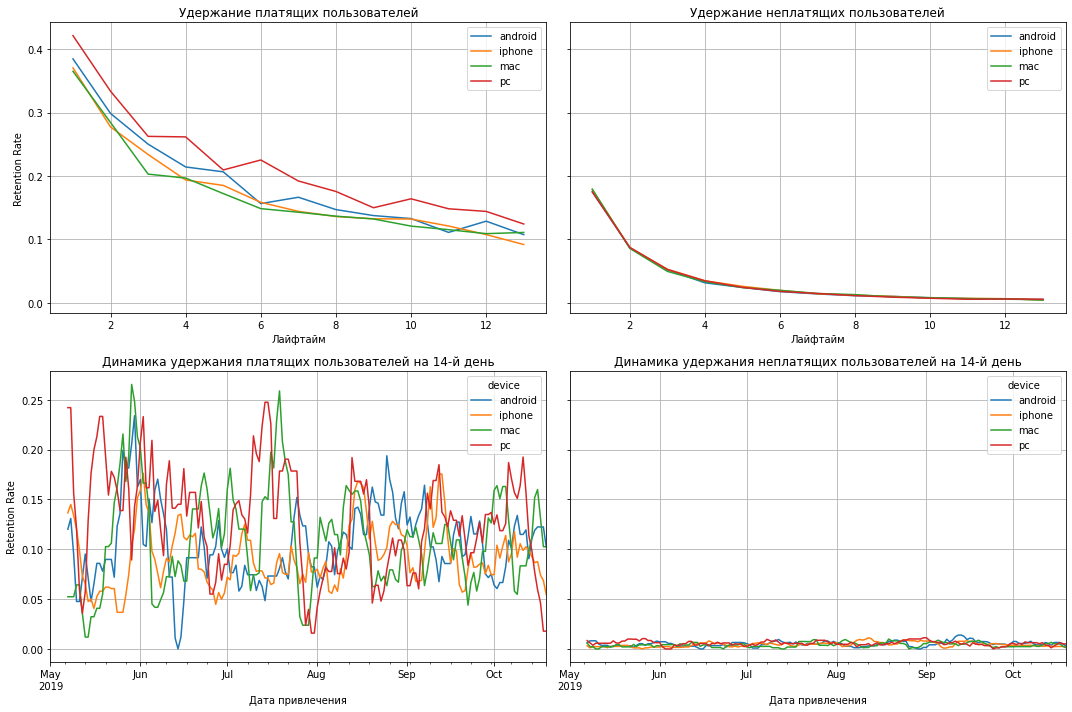

In [39]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи ПК конвертируются хуже остальных, но их удержание выше, вряд ли проблема кроется в платформах.

#### Промежуточный вывод по этапу оценки окупаемости рекламы

- Реклама в целом не окупается: уровень ROI на конец второй недели примерно 0.8

- Каналы привлечения FaceBoom, TipTop и AdNonSense являются убыточными для приложения Procrastinate Pro, в США реклама не окупается, в Европе она окупается везде

- Возможно проблема кроется в том, что затраты на рекламу в TipTop слишком высокие, возможно также выше описанные каналы плохо справляются с привлечением нужной приложению аудитории. Возможно в выше описанных каналах слишком дорогая реклама.

### Рекомендации

- **Причины неэффективности привлечения пользователей:** упор **только** на американскую аудиторию, расход рекламного бюджета **только** на один канал привлечения

- **Рекомендации для отдела маркетинга:** **сократить** расходы на канал TipTop, так как удержание пользователей с него достаточно неплохое, но реклама не окупается, **пересмотреть** политику отношения с каналами FaceBoom и AdNonSense, так как удержание и окупаемость таких пользователей самое низкое относително других. Следует обратить внимание на европейских клиентов и **европейские каналы привлечения**: увеличить расходы рекламного бюджета на такие каналы, как labmdaMediaAds, RocketSuperAds или OppleCreativeMedia, также стоит обратить внимание на канал YRabbit, у него самый высокий ROI.

### Общий вывод

В нашем распоряжении данные о визитах, заказах и рекламных расходах приложения Procrastinate Pro+.

Были выявлены причины неэффективности привлечения пользователей: 
- упор **только** на американскую аудиторию
- расход рекламного бюджета **только** на один канал привлечения.

Были сформулированы рекомендации для отдела маркетинга: 
- **сократить** расходы на канал TipTop, так как удержание пользователей с него достаточно неплохое, но реклама не окупается

- **пересмотреть** политику отношения с каналами FaceBoom и AdNonSense, так как Retention Rate и ROI таких пользователей самые низкие относително других. 
- Следует обратить внимание на европейских клиентов и **европейские каналы привлечения**: увеличить расходы рекламного бюджета на такие каналы, как labmdaMediaAds, RocketSuperAds или OppleCreativeMedia, так как у них высокий Retention Rate и LTV при небольших расходах на рекламу, также стоит обратить внимание на канал YRabbit, у него самый высокий ROI.
- Следует обратить внимание на **пользоватей ПК**, так как при небольших расходах ROI больше единицы

Выводы по предобработке данных:

**Пропуски**:
Пропуски отсутствуют во всех таблицах

**Дупликаты**:
Полное отсутствие явных и неявынх дупликатов

**Аномальные значения**:
Аномальных значений не обнаружено

**Типы данных**:
Были изменениы типы данных в столбцах с датой на datetime

Были написаны функции для расчёта и анализа LTV, ROI, удержания и конверсии, а также для построения графиков.

Были получены профили пользователей: их уникальное id, дата и время первого посещения, регион, девайс, с которого был осуществлен вход, канал привлечения, месяц первого посещения, а также информация о том, является ли пользователь платящим или нет.

- Общая сумма расходов на рекламу за полгода составила 105497$.

- Больше всего средств было потрачено на каналы TipTop - 54751.3 и FaceBoom - 32445.6.

- Были построены графики динамики расходов на каналы привлечения по неделям и месяцам.

- После модифицирования функции get_profiles() была получена средняя стоимость привлечения одного клиента с одного канала. Самое высокое среднее САС принадлежит TipTop - 2.8$

- Реклама в целом не окупается: уровень ROI на конец второй недели примерно 0.8

- Каналы привлечения FaceBoom, TipTop и AdNonSense являются убыточными для приложения Procrastinate Pro, в США реклама не окупается, в Европе она окупается везде

- Возможно проблема кроется в том, что затраты на рекламу в TipTop слишком высокие, возможно также выше описанные каналы плохо справляются с привлечением нужной приложению аудитории. Возможно в выше описанных каналах слишком дорогая реклама.